In [58]:
import csv
import tensorflow as tf
import numpy as np
!pip3 install matplotlib
import matplotlib.pyplot as plt
!pip3 install pandas
import pandas as pd
from pandas.plotting import autocorrelation_plot
from pandas.plotting import scatter_matrix
!pip3 install scipy
import scipy

You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 24.8MB 461kB/s eta 0:00:01  6% |██▏                             | 1.7MB 22.5MB/s eta 0:00:02    13% |████▍                           | 3.4MB 6.1MB/s eta 0:00:04    15% |█████                           | 3.8MB 7.6MB/s eta 0:00:03
You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [49]:
data = []
with open('AAPL_2012-06-21_34200000_57600000_orderbook_1.csv', 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar=',')
    for i,row in enumerate(spamreader):
        data.append([float(x) for x in row[0].split(',')])

In [50]:
cols = ['ask', 'ask volume', 'bid', 'bid volume']
order_book_data = pd.DataFrame(data,columns=cols)

In [51]:
order_book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118497 entries, 0 to 118496
Data columns (total 4 columns):
ask           118497 non-null float64
ask volume    118497 non-null float64
bid           118497 non-null float64
bid volume    118497 non-null float64
dtypes: float64(4)
memory usage: 3.6 MB


In [52]:
order_book_data.describe()

,ask,ask volume,bid,bid volume
count,1.184970e+05,118497.000000,1.184970e+05,118497.000000
mean,5.832164e+06,147.192756,5.830614e+06,227.196098
std,3.011296e+04,322.324547,2.974940e+04,834.106199
min,5.775000e+06,1.000000,5.774500e+06,1.000000
25%,5.810700e+06,42.000000,5.809700e+06,98.000000
50%,5.835100e+06,100.000000,5.833600e+06,100.000000
75%,5.858800e+06,166.000000,5.857000e+06,200.000000
max,5.882200e+06,15041.000000,5.881500e+06,22244.000000


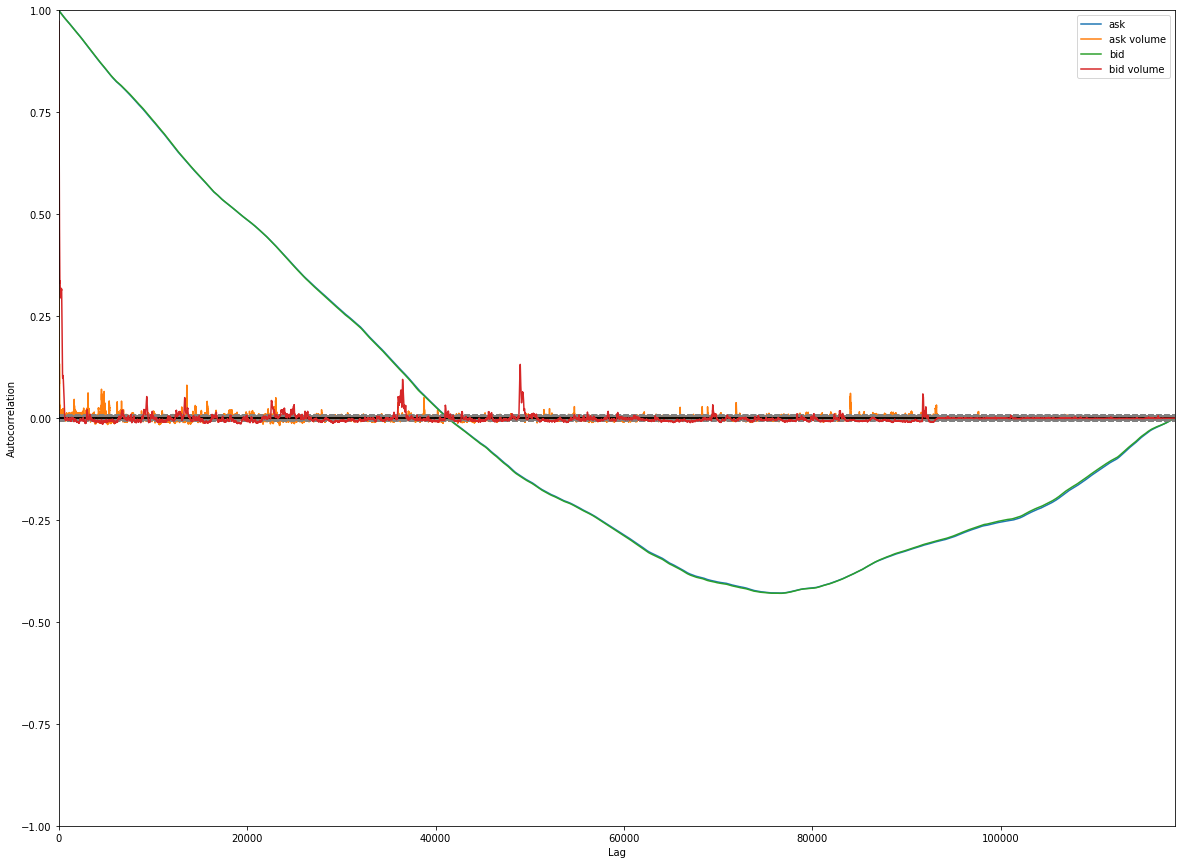

In [54]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(15)

for col in cols:
    _ = autocorrelation_plot(order_book_data[col], label=col)
_ = plt.legend(loc='upper right')

In [62]:
log_order_book = pd.DataFrame()

for col in cols:
    log_order_book[col] = np.log(order_book_data[col]/order_book_data[col].shift())
    
log_order_book.describe()

,ask,ask volume,bid,bid volume
count,1.184960e+05,118496.000000,1.184960e+05,118496.000000
mean,-1.199587e-07,0.000003,-1.130678e-07,0.000026
std,4.680640e-05,1.107127,4.843136e-05,0.942865
min,-6.468526e-04,-8.006368,-1.023419e-03,-7.695303
25%,0.000000e+00,0.000000,0.000000e+00,0.000000
50%,0.000000e+00,0.000000,0.000000e+00,0.000000
75%,0.000000e+00,0.000000,0.000000e+00,0.000000
max,6.322463e-04,9.615805,9.040589e-04,7.695303


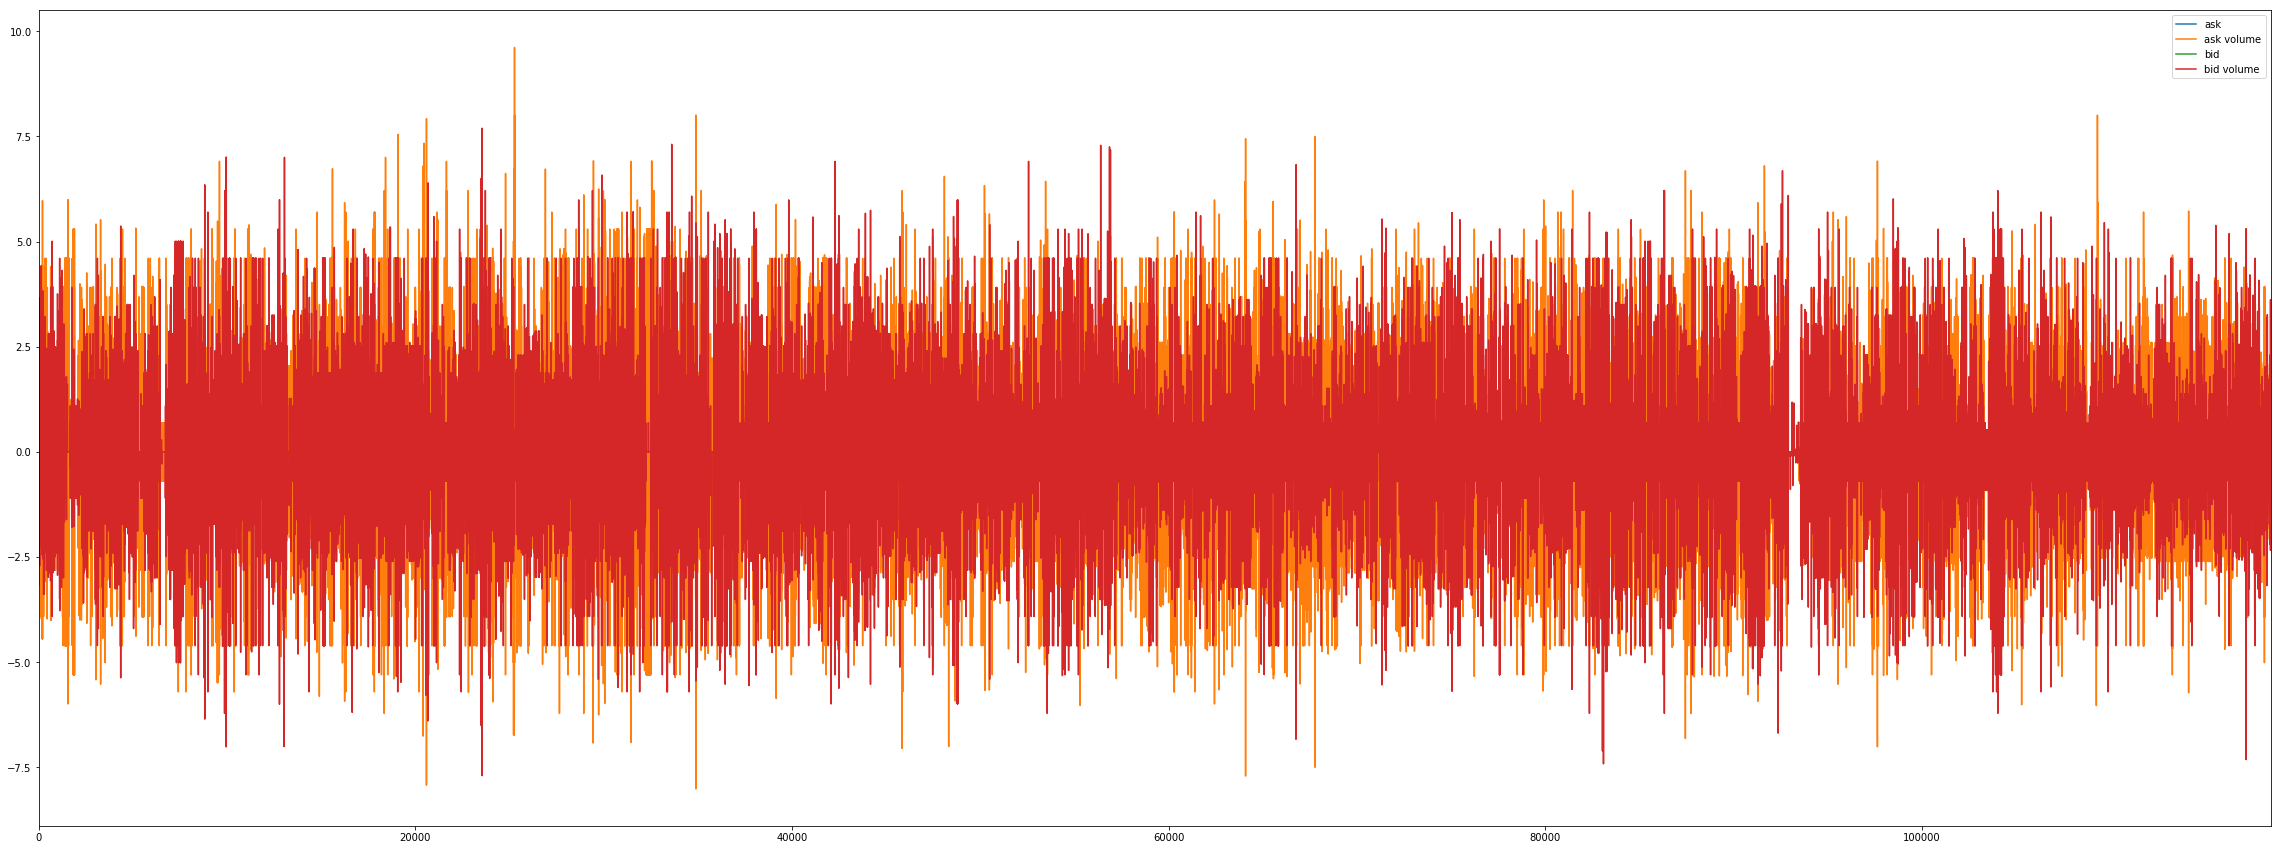

In [63]:
_ = pd.concat([log_order_book[col] for col in cols], axis=1).plot(figsize=(40, 15))

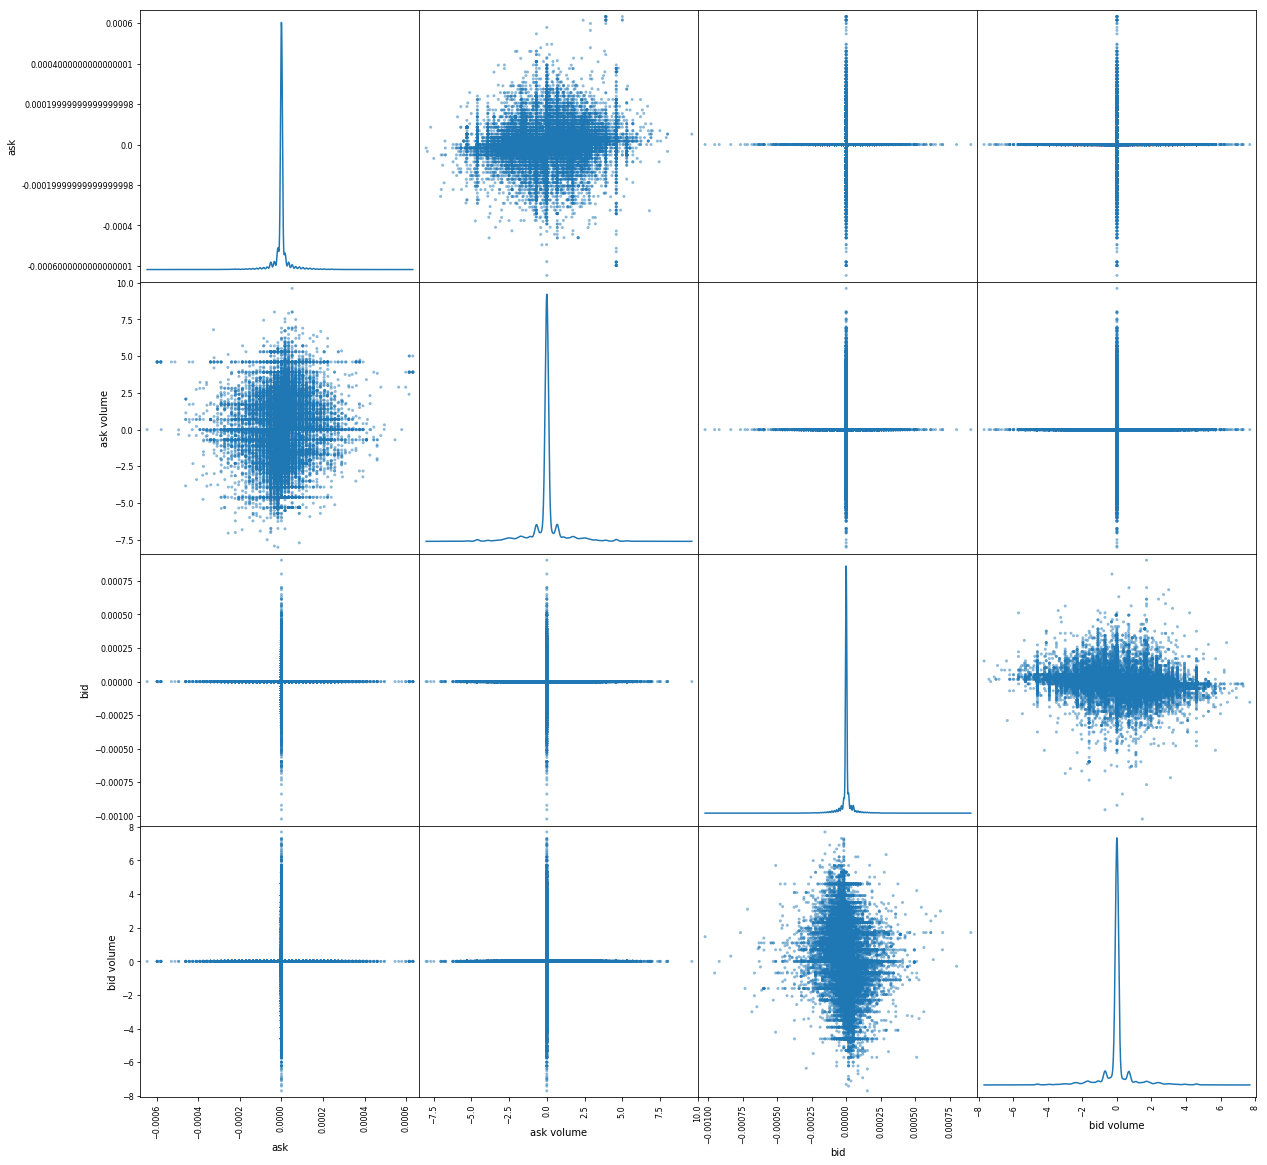

In [64]:
_ = scatter_matrix(log_order_book, figsize=(20, 20), diagonal='kde')